Практическая работа №4

Настройка параметров SVM и его использование
для решения задач бинарной классификации.

Выполнила: Блинова ЕМ, КЭ-128

In [ ]:
#!pip install mglearn

In [31]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.svm import SVC
import mglearn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

# 1. Параметры SVM и предварительная нормализация данных.

Решаются задачи:
- линейный SVM для линейно разделимых классов;
- нелинейный SVM для линейно неразделимых классов
- подбор параметров SVM для решения задачи нелинейной разделимости;
- влияние предварительной нормализации данных на работу SVM

## 1) линейный SVM для линейно разделимых классов

### Загрузка данных
Исходные данные - в файле ex4data1.mat

In [47]:
data = loadmat('ex4data1.mat')
X = data["X"]
y = data["y"].ravel()

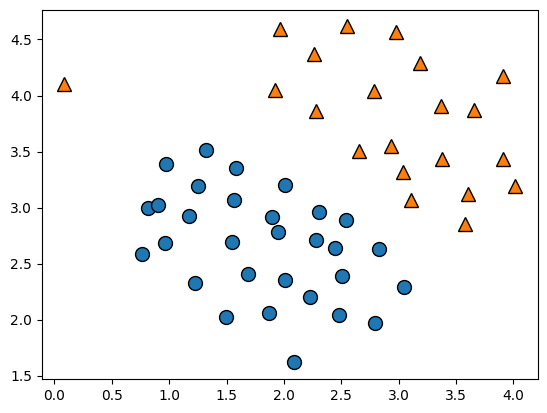

In [48]:
plt.figure()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

На графике представлен выброс

### Построение линейного SVM классификатора

In [49]:
svclassifier = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
svclassifier.fit(X,y)
svclassifier.score(X,y)

0.9803921568627451

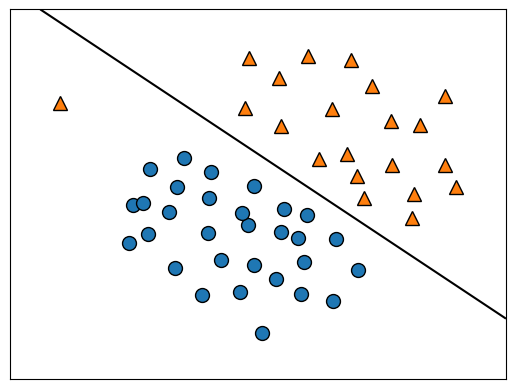

In [50]:
# Строим линию, разделяющую два класса
mglearn.plots.plot_2d_separator(svclassifier, X, eps=.5)
# Строим исходный набор данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### Оценка качества решение задачи
Влияние параметра С на результаты:
- С = 2000
- С = 500

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


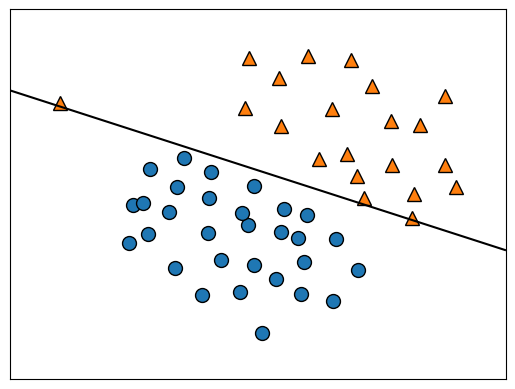

In [51]:
svclassifier = svm.LinearSVC(C = 2000, loss='hinge', max_iter=10000)
svclassifier.fit(X, y)
svclassifier.score(X, y)
mglearn.plots.plot_2d_separator(svclassifier, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


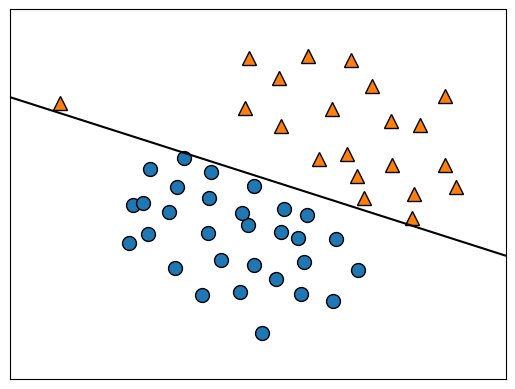

In [52]:
svclassifier = svm.LinearSVC(C = 500, loss='hinge', max_iter=10000)
svclassifier.fit(X, y)
svclassifier.score(X, y)
mglearn.plots.plot_2d_separator(svclassifier, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### Выводы:
С - это параметр регуляризации. Меньшее значение С увеличивает регуляризацию с увеличением ошибки классификации. Большие значения С уменьшают регулярзацию, классифицируя все точки обучающей выборки (подгон решения под ответ)
- С = 1: модель допускает ошибки в обучающей выборке, но лучше обобщает новые данные;
- С = 2000: модель идеально классифицирует обучающие данные, но плохо обобщает новые (переобучение).

## 2) нелинейный SVM для линейно неразделимых классов



### Загрузка данных
Исходные данные - в файле ex4data2.mat

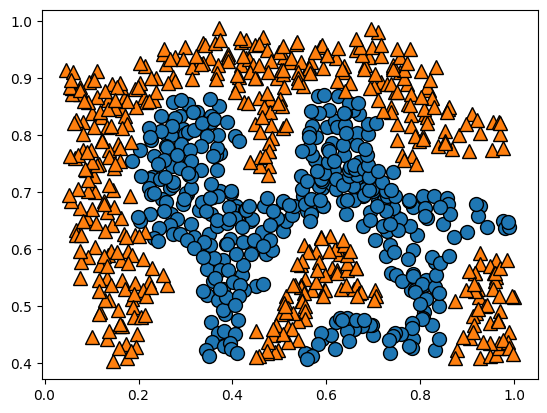

In [53]:
data = loadmat('ex4data2.mat')
X = data["X"]
y = data["y"].ravel()

plt.figure()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

### Построение нелинейного SVM классификатора

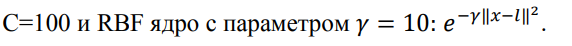

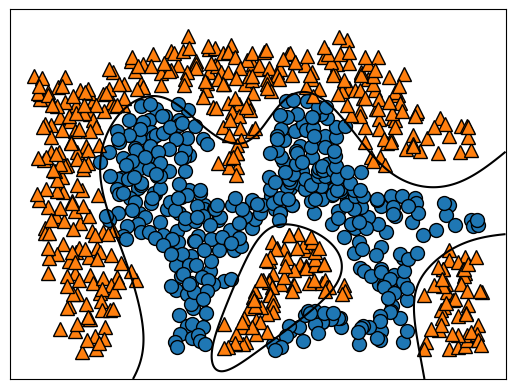

In [54]:
svmclassifier = svm.SVC(kernel='rbf', C=100, gamma=10)
svmclassifier.fit(X,y)
# Строим кривую, разделяющую два класса
mglearn.plots.plot_2d_separator(svmclassifier, X, eps=.05)
# Строим исходный набор данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### Оценка и увеличение точности работы классификатора

In [55]:
svclassifier.score(X, y)

0.44380069524913096

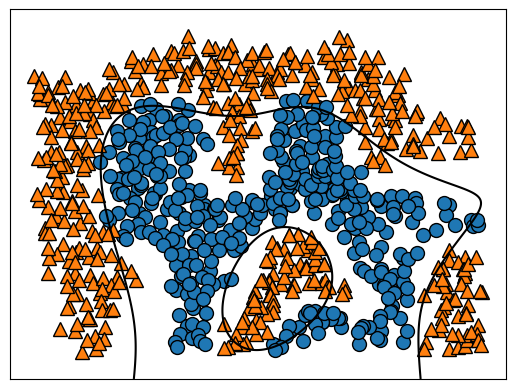

Точность: 0.93


In [56]:
svm2 = svm.SVC(kernel='rbf', C=5, gamma=10)
svm2.fit(X, y)
plt.figure()
mglearn.plots.plot_2d_separator(svm2, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

print(f'Точность: {svm2.score(X, y):.2f}')

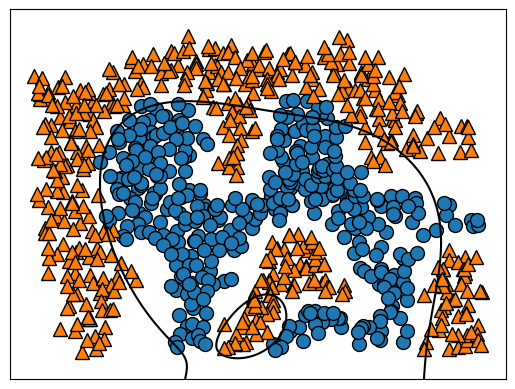

Точность: 0.87


In [57]:
svm3 = svm.SVC(kernel='rbf', C=5, gamma=5)
svm3.fit(X, y)
plt.figure()
mglearn.plots.plot_2d_separator(svm3, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

print(f'Точность: {svm3.score(X, y):.2f}')

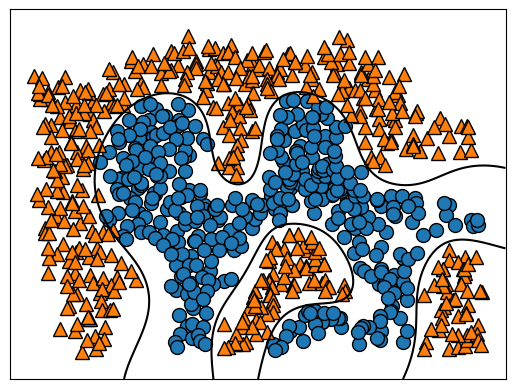

Точность: 1.00


In [58]:
svm4 = svm.SVC(kernel='rbf', C=10, gamma=50)
svm4.fit(X, y)
plt.figure()
mglearn.plots.plot_2d_separator(svm4, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

print(f'Точность: {svm4.score(X, y):.2f}')

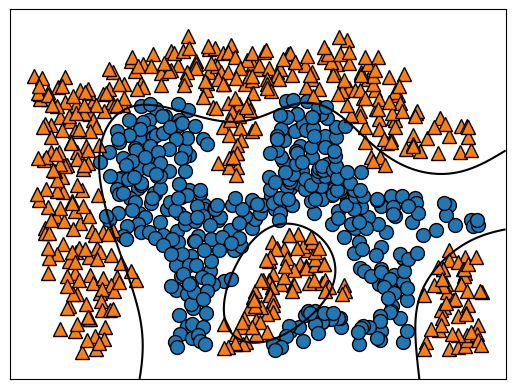

Точность: 0.95


In [37]:
svm5 = svm.SVC(kernel='rbf', C=10, gamma=10)
svm5.fit(X, y)
plt.figure()
mglearn.plots.plot_2d_separator(svm5, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

print(f'Точность: {svm5.score(X, y):.2f}')

### Выводы:
- точность можно увеличить за счет уменьшения значения С
- за счет изменения параметра гамма (параметр определяет, как далеко распространяется влияние одного обучающего объекта - влияет на размер области вокруг каждого тренировочного примера)
- высокие значения гамма: фокус на ближайших к гиперплоскости объектов, модель адаптируется к тренировочным данным
- малые значения гамма: фокус на дальних к гиперплоскости объектов, модель учитывает дальние точки при классификации, может привести к недообучению.

## 3) подбор параметров SVM для решения задачи нелинейной разделимости

### Загрузка данных
Исходные данные - в файле ex4data3.mat


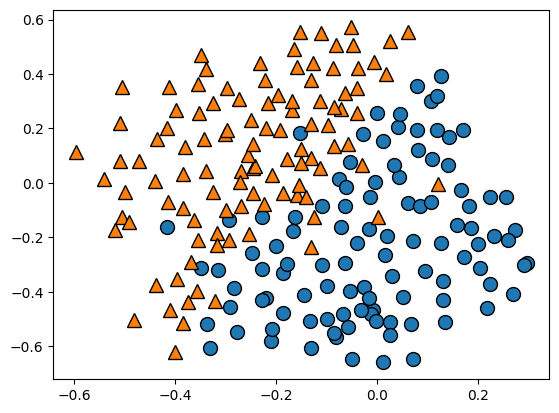

In [2]:
data = loadmat('ex4data3.mat')
X = data["X"]
y = data["y"].ravel()
Xval = data["Xval"]
yval = data["yval"].ravel()

plt.figure()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

### Построение классификатора

 решетчатый поиск (grid search)

In [3]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
worst_score = 1
total_score = 0
best_params = {'C': None, 'gamma': None}
worst_params = {'C': None, 'gamma': None}

results = []

num_combinations = 0
for C in C_values:
    for gamma in gamma_values:
        model = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
        model.fit(X, y)
        y_pred = model.predict(Xval)
        score = accuracy_score(yval, y_pred)
        results.append((C, gamma, score))

        total_score += score
        num_combinations += 1

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

        if score < worst_score:
            worst_score = score
            worst_params['C'] = C
            worst_params['gamma'] = gamma

average_score = total_score / num_combinations

results.sort(key=lambda x: x[2], reverse=True)

print(f"Лучший результат: {best_score:.4f}, параметры: {best_params}")
print(f"Худший результат: {worst_score:.4f}, параметры: {worst_params}")


Лучший результат: 0.9650, параметры: {'C': 0.3, 'gamma': 100}
Худший результат: 0.4350, параметры: {'C': 0.01, 'gamma': 0.01}


In [4]:
for result in results:
    print(f"C: {result[0]}, gamma: {result[1]}, accuracy: {result[2]:.4f}")

C: 0.3, gamma: 100, accuracy: 0.9650
C: 1, gamma: 100, accuracy: 0.9650
C: 3, gamma: 30, accuracy: 0.9650
C: 30, gamma: 10, accuracy: 0.9650
C: 0.3, gamma: 30, accuracy: 0.9600
C: 1, gamma: 30, accuracy: 0.9600
C: 3, gamma: 3, accuracy: 0.9600
C: 30, gamma: 30, accuracy: 0.9600
C: 0.3, gamma: 10, accuracy: 0.9550
C: 3, gamma: 10, accuracy: 0.9550
C: 100, gamma: 3, accuracy: 0.9550
C: 0.1, gamma: 30, accuracy: 0.9500
C: 1, gamma: 3, accuracy: 0.9500
C: 1, gamma: 10, accuracy: 0.9500
C: 10, gamma: 3, accuracy: 0.9500
C: 10, gamma: 10, accuracy: 0.9500
C: 10, gamma: 30, accuracy: 0.9500
C: 30, gamma: 3, accuracy: 0.9500
C: 100, gamma: 10, accuracy: 0.9500
C: 100, gamma: 30, accuracy: 0.9500
C: 3, gamma: 100, accuracy: 0.9450
C: 10, gamma: 100, accuracy: 0.9450
C: 1, gamma: 1, accuracy: 0.9400
C: 3, gamma: 0.3, accuracy: 0.9350
C: 10, gamma: 0.3, accuracy: 0.9350
C: 30, gamma: 0.1, accuracy: 0.9350
C: 30, gamma: 1, accuracy: 0.9350
C: 100, gamma: 0.03, accuracy: 0.9350
C: 100, gamma: 1, ac

####Классификатор на лучшей паре

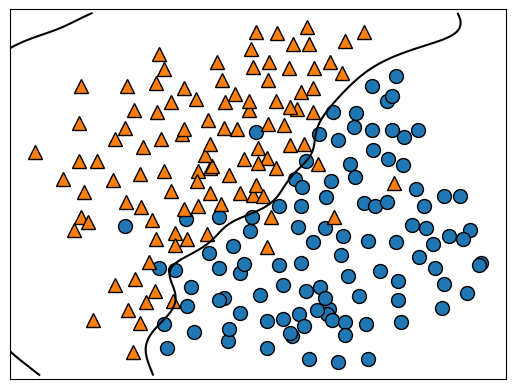

Точность: 0.95
Точность на проверочном наборе данных: 0.965
Параметры: {'C': 0.3, 'gamma': 100}


In [5]:
svm_best = svm.SVC(kernel='rbf', C=best_params["C"], gamma=best_params["gamma"])
svm_best.fit(X, y)
plt.figure()
mglearn.plots.plot_2d_separator(svm_best, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()
y_pred = svm_best.predict(Xval)
score = accuracy_score(yval, y_pred)
print(f'Точность: {svm_best.score(X, y):.2f}')
print(f'Точность на проверочном наборе данных: {score}')
print(f'Параметры: {best_params}')

#### Прочие нелучшие классификаторы:

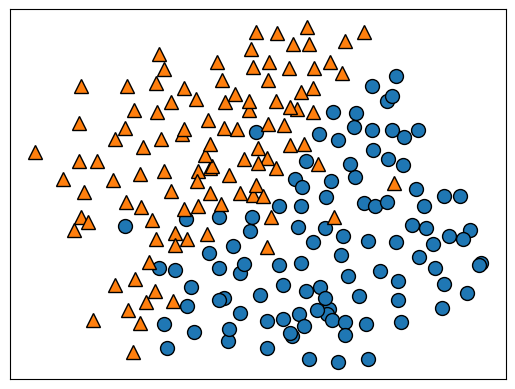

Точность: 0.50
Точность на проверочном наборе данных: 0.435
Параметры: {'C': 0.01, 'gamma': 0.01}


In [6]:
svm_1 = svm.SVC(kernel='rbf', C=0.01, gamma=0.01)
svm_1.fit(X, y)

plt.figure()
mglearn.plots.plot_2d_separator(svm_1, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

y_pred = svm_1.predict(Xval)
score = accuracy_score(yval, y_pred)

print(f'Точность: {svm_1.score(X, y):.2f}')
print(f'Точность на проверочном наборе данных: {score}')
print(f'Параметры: {worst_params}')

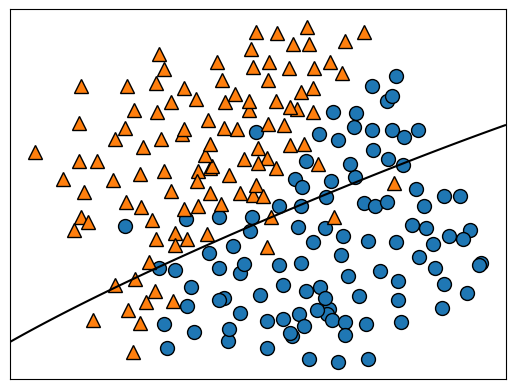

Точность: 0.82
Точность на проверочном наборе данных: 0.795
Параметры: C=0.03, gamma=1


In [7]:
svm_2 = svm.SVC(kernel='rbf', C=0.03, gamma=1)
svm_2.fit(X, y)

plt.figure()
mglearn.plots.plot_2d_separator(svm_2, X, eps=.05)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

y_pred = svm_2.predict(Xval)
score = accuracy_score(yval, y_pred)

print(f'Точность: {svm_2.score(X, y):.2f}')
print(f'Точность на проверочном наборе данных: {score}')
print(f'Параметры: C=0.03, gamma=1')

## 4) влияние предварительной нормализации данных на работу SVM (Breast Cancer)

### Загрузка набора данных

In [8]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

### Построение классификатора

In [9]:
svc = svm.SVC()
svc.fit(X_train, y_train)
print(f'Правильность на обучающем наборе: {svc.score(X_train, y_train):.2f}')
print(f'Правильность на тестовом наборе: {svc.score(X_test, y_test):.2f}')

Правильность на обучающем наборе: 0.92
Правильность на тестовом наборе: 0.92


### Построение минимального и максимального значений признаков

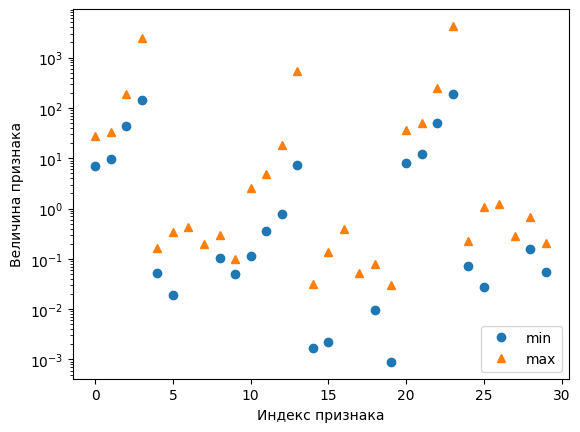

In [10]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")

Признаки отличаются очень сильно. Необходима нормализация данных

### Нормализация данных
Приведение данных к единой размерности

In [11]:
def min_max_scaler(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)

    X_scaled = (X - X_min) / (X_max - X_min)

    return X_scaled

Text(0, 0.5, 'Величина признака')

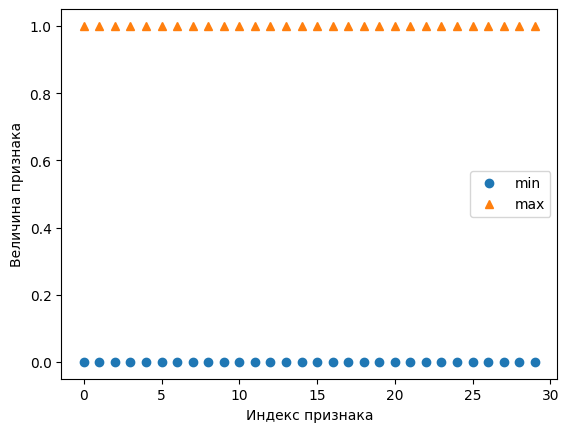

In [12]:
X_train = min_max_scaler(X_train)

plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')

plt.legend(loc='best')

plt.xlabel('Индекс признака')
plt.ylabel('Величина признака')

### Построение классификатора на нормализованных данных

In [13]:
X_test = min_max_scaler(X_test)
svc = svm.SVC()
svc.fit(X_train, y_train)

print(f'Правильность на обучающем наборе: {svc.score(X_train, y_train):.2f}')
print(f'Правильность на тестовом наборе: {svc.score(X_test, y_test):.2f}')

Правильность на обучающем наборе: 0.98
Правильность на тестовом наборе: 0.97


### Анализ настройки параметров для улучшения точности
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [14]:
param_grid = {
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = svm.SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)
print('Лучшая точность на тренировочных данных: ', grid_search.best_score_)

Лучшие параметры:  {'C': 30, 'gamma': 0.1, 'kernel': 'sigmoid'}
Лучшая точность на тренировочных данных:  0.9788508891928865


# 2. Решение задачи классификации: спам/не спам
Классификатор SVM будет определять, является ли данное письмо x спамом (y=1)
или не спамом (y=0) .


## Загрузка данных

In [15]:
f = open('emailSample1.txt', 'r').read()
f

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com"

## Предобработка данных
- В функции processEmail были реализованы следующие этапы предварительной
обработки и нормализации электронной почты:
- Строчный регистр (Lower-casing): вся электронная почта преобразуется в нижний
регистр, использование заглавных букв игнорируется (например, IndIcaTE обрабатывается
так же, как и Indicate).
- Удаление HTML (Stripping HTML): все HTML удаляются из электронных писем.
- Нормализация URL (Normalizing URLs): все URL заменяются текстом «httpaddr».
- Нормализация адресов электронной почты (Normalizing Email Addresses): все адреса
электронной почты заменяются текстом «emailaddr»..
- Нормализация чисел (Normalizing Numbers): все числа заменяются текстом «число».
- Нормализация доллара (Normalizing Dollars): все знаки доллара ($) заменяются текстом
«доллар».
- Стемминг слов (Word Stemming): слова сводятся к их основной форме. Например,
“discount”, “discounts”, “discounted” и“discounting” заменяются на “discount”. Иногда
стемминг фактически удаляет символы с конца, так что “include”, “includes”, “included” и
“including” все заменяются на “includ”.
- Удаление не-слов (Removal of non-words): не-слова и знаки препинания удаляются. Все
пробелы (табуляции, новые строки, пробелы) обрезаются до одного пробела.

Использовался стемминг - приведение слов к базовой форме: текст разбивается на слова, стеммер применяется ко всем словам в тексте, затем обработанные слова объединяются в одну строку через пробел.

In [23]:
def processEmail(email):
    email = email.lower()
    email = re.sub(r'<[^<>]+>', ' ', email)
    email = re.sub(r'(http|https)://[^\s]*', 'httparrd', email)
    email = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub(r'\d+', 'number', email)
    email = re.sub(r'\$', 'dollar', email)
    email = re.sub(r'[^a-zA-Z\s]', '', email)

    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in email.split()]

    return ' '.join(stemmed_words)

In [24]:
normal_email = processEmail(f)
normal_email

'anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httparrd or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr'

## Словарь слов
Были выбраны только наиболее часто встречающиеся слова в качестве
набора рассматриваемых слов (словарь слов). Использование слов, которые редко
встречаются в обучающем наборе (только в нескольких электронных письмах) может
привести к переобучению нашей модели.

Список слов находится в файле vocab.txt. Этот словарь был создан путем выбора всех
слов, которые встречаются не менее 100 раз среди всех спам-писем.

Каждому слову письма (предварительно обработанного) можно поставить в
соответствие индекс этого слова из словаря. Например, слову «anyone»
преобразованному до «anyon» соответствует число 86 в списке словаря.

В коде заданная строка,
представляющая собой одно слово из обработанного электронного письма, ищется в
списке словаря vocabList. Если слово есть в словаре, индекс слова добавляется в
переменную word_indices. Если же слово отсутствует в словаре, то его можно пропустить.

In [28]:
# Загрузка словаря
def loadVocabList(filename='vocab.txt'):
    vocabList = []
    with open(filename, 'r') as file:
        for line in file:
            vocabList.append(line.strip().split()[1])
    return vocabList

In [26]:
# Отображение слов в индексы
def emailToWordIndices(email_contents, vocabList):
    word_indices = []
    words = email_contents.split()

    for word in words:
        if word in vocabList:
            word_indices.append(vocabList.index(word) + 1)  # Индексы в словаре начинаются с 1

    return word_indices

In [30]:
vocab = loadVocabList(filename='vocab.txt')
word_indices = emailToWordIndices(normal_email, vocab)
print(word_indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


## Вектор признаков для каждого письма
- n = 1899 (объем словаря)
- xi = 1 (i-е слово словаря есть в письме)
- xi = 0 (i-е слово словаря отсутствует в письме)
Функция emailFeatures генерирует вектор признаков для каждого письма. Для нашего
примера это будет вектор с 43 ненулевыми элементами.

In [32]:
def emailFeatures(word_indices, vocab_size=1899):
    feature_vector = np.zeros(vocab_size)
    for index in word_indices:
        feature_vector[index - 1] = 1

    return feature_vector

In [33]:
feature_vector = emailFeatures(word_indices)

print(f"Длина вектора признаков: {len(feature_vector)}")
print(f"Число ненулевых элементов: {int(np.sum(feature_vector))}")
print(f"Вектор признаков: {feature_vector}")

Длина вектора признаков: 1899
Число ненулевых элементов: 43
Вектор признаков: [0. 0. 0. ... 0. 0. 0.]


## Обучение SVM классификатора
spamTrain.mat содержит 4000 примеров спама и не спама, а spamTest.mat содержит 1000
тестовых примеров.

In [34]:
# Загрузка данных
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')

X_train = spam_train['X']
y_train = spam_train['y'].ravel()

X_test = spam_test['Xtest']
y_test = spam_test['ytest'].ravel()

In [50]:
# Создание модели линейного классификатора
model_email_linear = svm.SVC(kernel='linear')
model_email_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
# Создание модели нелинейного классификатора
model_email_rbf = svm.SVC(kernel='rbf')
model_email_rbf.fit(X_train, y_train)

SVC()

In [52]:
# Оценка точности
print(f'Точность линейного классификатора на обучающем наборе: {(model_email_linear.score(X_train, y_train) * 100):.2f}%')
print(f'Точность линейного классификатора на тестовом наборе: {(model_email_linear.score(X_test, y_test) * 100):.2f}%')

Точность линейного классификатора на обучающем наборе: 99.98%
Точность линейного классификатора на тестовом наборе: 97.80%


In [53]:
# Оценка точности
print(f'Точность нелинейного классификатора на обучающем наборе: {(model_email_rbf.score(X_train, y_train) * 100):.2f}%')
print(f'Точность нелинейного классификатора на тестовом наборе: {(model_email_rbf.score(X_test, y_test) * 100):.2f}%')

Точность нелинейного классификатора на обучающем наборе: 99.33%
Точность нелинейного классификатора на тестовом наборе: 98.70%


In [41]:
def classifier(file, model, voc):
    sample = open(file, 'r').read()
    print(sample)
    process = processEmail(sample)
    index_word = emailToWordIndices(process, voc)
    feat = emailFeatures(index_word)

    result = model.predict([feat])
    if result == 1:
        print(f'{result} - spam')
    else:
        print(f'{result} - not spam')

## Проверка работы классификатора

### Письма для проверки

In [54]:
classifier('emailSample1.txt', model_email_rbf, vocab)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
[0] - not spam


In [55]:
classifier('emailSample2.txt', model_email_rbf, vocab)

Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've searched the 'ne

In [56]:
classifier('spamSample1.txt', model_email_rbf, vocab)

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72

[1] - spam


In [57]:
classifier('spamSample2.txt', model_email_rbf, vocab)

Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru
[1] - spam


### Мои письма

In [58]:
classifier('my_sample.txt', model_email_rbf, vocab)

User Alexander Viktorovich Klauzer has submitted a new response to the assignment "Windows API. Process Creation." Submission date: Thursday, October 31, 2024, 02:58 AM. Responses to this assignment are available on the website.
[0] - not spam


In [59]:
classifier('timepad.txt', model_email_rbf, vocab)

Hello!

Want to take your business to the next level?

Then we invite you to take part in a large-scale business event of the fall — the Equium forum!

It doesn’t matter how long you’ve been doing business — a couple of months or more than 20 years. It’s never too late to reveal your talent, especially if you surround yourself with the right people and develop leadership skills.

Equium is a place where a strong community of like-minded people is formed, successful business strategies and tactics are shared, new partnerships and collaborations are created, and innovative solutions are promoted.

The brightest and most sought-after experts will gather on one platform: Artemy Lebedev, Konstantin Tszyu, Vladimir Perelman, Igor Stoyanov, Denis Kutergin, Ekaterina Rybakova and many others. They will share their knowledge and experience to help you achieve success.

When: November 20 and 21.
Where: Yekaterinburg, MTS Live Hall.

Don't miss the opportunity to improve your skills, make useful 